In [25]:
import tensorflow as tf
import numpy as np

In [26]:
image_size = int (10 * 10 * 3)
layer_size_1 = int (image_size / 2)
layer_size_2 = int (layer_size_1 / 2)

In [27]:
learning_rate = 0.05

In [28]:
test_dataset = list()

for i in range(10):
    test_dataset.append(np.random.uniform(0, 1, size=(10, 10, 3)).reshape(10 * 10 * 3))

In [29]:
input_x = tf.placeholder(tf.float32, [None, 10 * 10 * 3])

In [30]:
input_decoder = tf.placeholder(tf.float32, [layer_size_1, layer_size_2])

In [31]:
encoder_weight_1 = tf.Variable(tf.truncated_normal([image_size, layer_size_1]))
encoder_weight_2 = tf.Variable(tf.truncated_normal([layer_size_1, layer_size_2]))

encoder_biases_1 = tf.Variable(tf.truncated_normal([layer_size_1]))
encoder_biases_2 = tf.Variable(tf.truncated_normal([layer_size_2]))

In [32]:
encoder_layer1 = tf.add(tf.matmul(input_x, encoder_weight_1), encoder_biases_1)
encoder_layer1 = tf.nn.sigmoid(encoder_layer1)

encoder_layer2 = tf.add(tf.matmul(encoder_layer1, encoder_weight_2), encoder_biases_2)
encoder_layer2 = tf.nn.sigmoid(encoder_layer2)

In [33]:
decoder_weight_1 = tf.Variable(tf.truncated_normal([layer_size_2, layer_size_1]))
decoder_weight_2 = tf.Variable(tf.truncated_normal([layer_size_1, image_size]))

decoder_biases_1 = tf.Variable(tf.truncated_normal([layer_size_1]))
decoder_biases_2 = tf.Variable(tf.truncated_normal([image_size]))

In [34]:
decoder_layer1 = tf.add(tf.matmul(encoder_layer2, decoder_weight_1), decoder_biases_1)
decoder_layer1 = tf.nn.sigmoid(decoder_layer1)

decoder_layer2 = tf.add(tf.matmul(decoder_layer1, decoder_weight_2), decoder_biases_2)
decoder_layer2 = tf.nn.sigmoid(decoder_layer2)

In [35]:
_f = decoder_layer2
f = input_x

In [36]:
loss = tf.reduce_mean(tf.pow(f - _f, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

In [37]:
sess = tf.Session()

In [38]:
sess.run(tf.global_variables_initializer())

In [39]:
for i in range(1000):
    sess.run(optimizer, feed_dict={input_x: test_dataset})
    
    if i % 100 == 0:
        print (sess.run(loss, feed_dict={input_x: test_dataset}))

0.28721574
0.2304908
0.17457482
0.03832796
0.026654098
0.030147146
0.028043713
0.030767146
0.030345265
0.028766934


In [40]:
from matplotlib import pyplot as plt

In [41]:
test_data_view = np.array(test_dataset[0]).reshape((10, 10, 3))

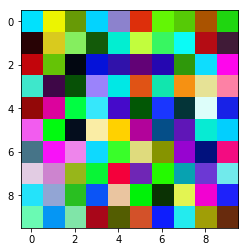

In [42]:
encoder_build_data = np.array(sess.run(decoder_layer2, feed_dict={input_x: [test_dataset[0]]})[0]).reshape((10, 10, 3))

plt.imshow(encoder_build_data)
plt.show()

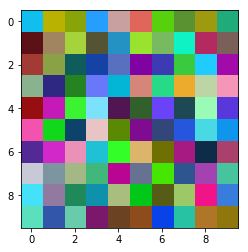

In [43]:
plt.imshow(test_data_view)
plt.show()